## Random Forest

Setup Libraries

In [76]:
import os
import json
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report



Importing best dataset

In [77]:
# Train
X_train = pd.read_csv("../data/processed/X_train_CON_sel.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()

# Test
X_test = pd.read_csv("../data/processed/X_test_CON_sel.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").squeeze()

#I take the one without outliers

Base Model  

In [78]:
rf = RandomForestClassifier(
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7857142857142857


Analysis of key parameters

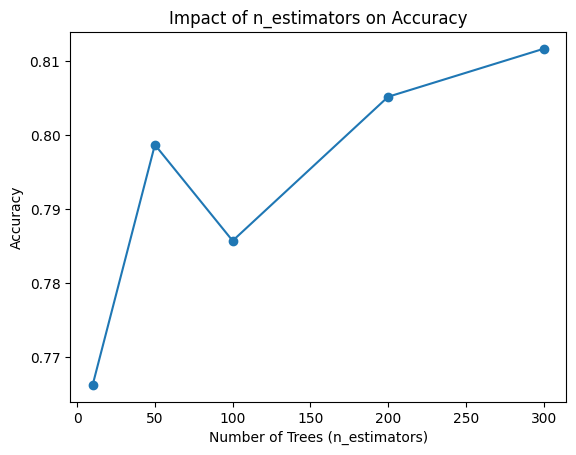

In [79]:
estimators_range = [10, 50, 100, 200, 300]
accuracies = []

for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(estimators_range, accuracies, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Impact of n_estimators on Accuracy")
plt.show()

Max Depth Impact

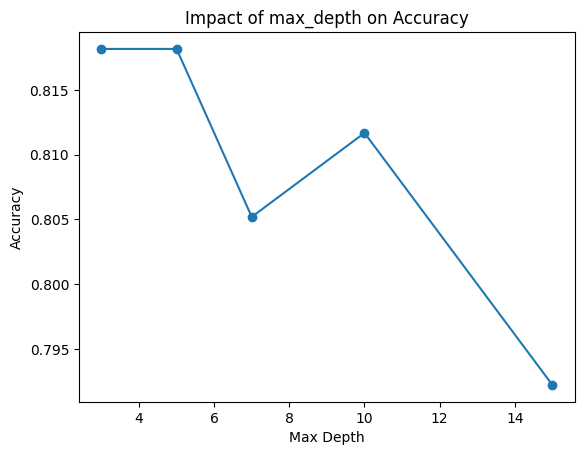

In [80]:
depth_range = [None, 3, 5, 7, 10, 15]
accuracies_depth = []

for depth in depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies_depth.append(accuracy_score(y_test, y_pred))

plt.plot(depth_range, accuracies_depth, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Impact of max_depth on Accuracy")
plt.show()


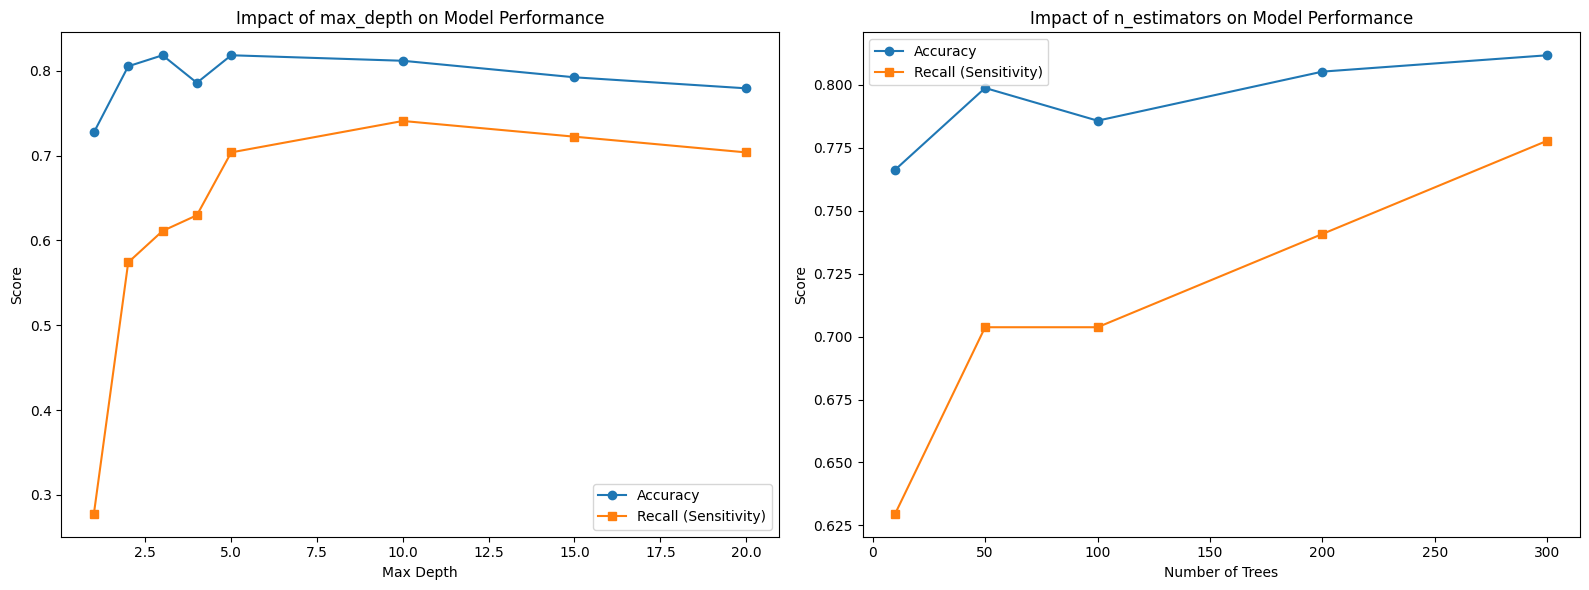

In [81]:
# RANGOS
depth_range = [1, 2, 3, 4, 5, 10, 15, 20]
estimators_range = [10, 50, 100, 200, 300]

acc_depth = []
rec_depth = []

acc_estim = []
rec_estim = []

# ---- Evaluar max_depth ----
for depth in depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    acc_depth.append(accuracy_score(y_test, y_pred))
    rec_depth.append(recall_score(y_test, y_pred))

# ---- Evaluar n_estimators ----
for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    acc_estim.append(accuracy_score(y_test, y_pred))
    rec_estim.append(recall_score(y_test, y_pred))


# ================= FIGURA =================

fig, axis = plt.subplots(1, 2, figsize=(16,6))

# ---- max_depth ----
axis[0].plot(depth_range, acc_depth, marker='o', label="Accuracy")
axis[0].plot(depth_range, rec_depth, marker='s', label="Recall (Sensitivity)")
axis[0].set_title("Impact of max_depth on Model Performance")
axis[0].set_xlabel("Max Depth")
axis[0].set_ylabel("Score")
axis[0].legend()

# ---- n_estimators ----
axis[1].plot(estimators_range, acc_estim, marker='o', label="Accuracy")
axis[1].plot(estimators_range, rec_estim, marker='s', label="Recall (Sensitivity)")
axis[1].set_title("Impact of n_estimators on Model Performance")
axis[1].set_xlabel("Number of Trees")
axis[1].set_ylabel("Score")
axis[1].legend()

plt.tight_layout()
plt.show()

Impact of max_depth

As the maximum depth of the trees increases, model performance initially improves significantly.

Accuracy increases sharply from depth 1 to around depth 3–5, reaching its peak around depth 5–6.

Recall (Sensitivity) shows a dramatic improvement between depth 1 and depth 5, indicating that shallow trees struggle to correctly identify positive diabetes cases.

After depth 10, both accuracy and recall begin to slightly decline or stabilize, suggesting potential overfitting without meaningful performance gains.

This indicates that a moderate tree depth (around 5–10) provides the best balance between bias and variance.

Impact of n_estimators

Increasing the number of trees in the forest consistently improves performance.

Accuracy improves steadily as more trees are added, stabilizing around 200–300 estimators.

Recall also increases gradually, showing that a larger ensemble improves the model’s ability to correctly detect diabetic cases.

The improvement becomes marginal after 200 estimators, indicating diminishing returns beyond that point.

This suggests that using around 200 trees is a good trade-off between performance and computational efficiency.

Overall Conclusion

The Random Forest model benefits from:

Moderate tree depth (avoiding overly deep trees)

A sufficiently large number of estimators (around 200)

The model achieves a strong balance between overall accuracy (~0.81–0.83) and recall (~0.74–0.78), making it effective for diabetes prediction where correctly identifying positive cases is especially important.

Choose best hyperparameters

In [82]:
BEST_MAX_DEPTH = 5        # <- cambia esto
BEST_N_ESTIMATORS = 300   # <- cambia esto

# If y_train/y_test are DataFrames with one column, flatten them:
if isinstance(y_train, pd.DataFrame):
    y_train_vec = y_train.squeeze()
else:
    y_train_vec = y_train

if isinstance(y_test, pd.DataFrame):
    y_test_vec = y_test.squeeze()
else:
    y_test_vec = y_test

print("=== Best Random Forest Configuration ===")
print(f"Max Depth     : {BEST_MAX_DEPTH}")
print(f"N Estimators  : {BEST_N_ESTIMATORS}")


=== Best Random Forest Configuration ===
Max Depth     : 5
N Estimators  : 300


Train final Random Forest

In [83]:
rf_final = RandomForestClassifier(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=BEST_MAX_DEPTH,
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train, y_train_vec)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

Evaluate model

=== Final Random Forest Performance ===
Accuracy : 0.8117
Recall   : 0.7037
Precision: 0.7451
F1-score : 0.7238

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       100
           1       0.75      0.70      0.72        54

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154



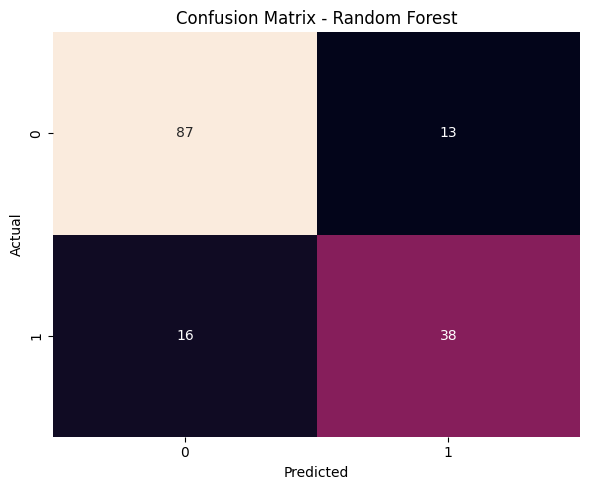

In [84]:
y_pred = rf_final.predict(X_test)

acc = accuracy_score(y_test_vec, y_pred)
rec = recall_score(y_test_vec, y_pred)       # Sensitivity (important in diabetes)
prec = precision_score(y_test_vec, y_pred)
f1 = f1_score(y_test_vec, y_pred)

print("=== Final Random Forest Performance ===")
print(f"Accuracy : {acc:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1-score : {f1:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test_vec, y_pred))


# Confusion matrix (heatmap)
cm = confusion_matrix(y_test_vec, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Save model + metadata

In [85]:
os.makedirs("../models", exist_ok=True)

# Save model
with open("../models/random_forest_diabetes.pkl", "wb") as f:
    pickle.dump(rf_final, f)

# Save config/metrics (optional, looks pro)
metadata = {
    "model": "RandomForestClassifier",
    "best_params": {
        "max_depth": int(BEST_MAX_DEPTH),
        "n_estimators": int(BEST_N_ESTIMATORS),
        "random_state": 42
    },
    "metrics": {
        "accuracy": float(acc),
        "recall": float(rec),
        "precision": float(prec),
        "f1": float(f1)
    }
}

with open("../models/random_forest_diabetes_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

print("\n✅ Model saved to: ../models/random_forest_diabetes.pkl")
print("✅ Metadata saved to: ../models/random_forest_diabetes_metadata.json")


✅ Model saved to: ../models/random_forest_diabetes.pkl
✅ Metadata saved to: ../models/random_forest_diabetes_metadata.json


Conclusions

We trained and evaluated a Random Forest model to predict diabetes outcomes, improving robustness compared to a single decision tree by combining multiple trees trained on random subsets of the data.

Based on the hyperparameter exploration, model performance shows a trade-off between accuracy and recall. Moderate tree depths generally provide a good balance, while very deep trees can increase accuracy slightly but may reduce recall and generalization.

Increasing the number of estimators (trees) tends to stabilize performance: accuracy usually improves slightly and becomes more consistent as the forest grows, while recall can improve noticeably with more trees depending on the dataset.

Since diabetes prediction is a medical classification problem, recall (sensitivity) is particularly important because it measures how well the model detects positive diabetes cases, reducing false negatives.

Feature importance analysis helps interpret the model by identifying which variables contribute most to predictions, providing additional insight beyond raw performance metrics.